# <center> Assignment 3 - Feed Forward Neural Network
###### Author: Rudraksh Kapil - 177154
In this notebook the following tasks are accomplished:
    1. General definitions and functions for feed forward neural network.
    2. Handwritten digit recognition.

In [2]:
# import statements
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tqdm import tqdm

### 1. Making Network

###### Activation Function
We use a sigmoid activation function

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

###### Prediction Function
Predicts output given X and weights and returns accuracy

In [12]:
# checks accuracy
def predict(X, y, w1, w2, verbose=True, bias=True):
    y_pred = []
    
    for x in X:
        h = sigmoid(x.dot(w1.T))
        if (bias):
            temp_h = np.append(np.ones(1), h) # becuase we dont want to add a bias term to h itself
        else:
            temp_h = h
        o = sigmoid(temp_h.dot(w2.T))
        y_pred.append(o)
        
    y_pred = np.asarray(y_pred)
    
    if (verbose):
        print('Predictions before thresholding ');
        print(y_pred)
        
    y_pred[y_pred <  0.5] = 0
    y_pred[y_pred >= 0.5] = 1
    if (verbose):
        print("Predictions => \n")
        print(y_pred)
    
    accuracy = np.mean(np.asarray(y_pred)==y)
    if (verbose):
        print(f"Accuracy => {accuracy*100}")
    return accuracy

###### Backprop Function
We use a two layer network with variable number of input, hidden, and output units.

In [14]:
def backprop(X, Y, n_hid, lr = 0.2, w_init=None, n_iters=1, batch=False,bias=True):
    if bias:
        # append ones col to X
        ones_col = np.ones((X.shape[0],1))
        X = np.concatenate((ones_col,X), axis=1)
    
    bias_int = 1 if bias else 0 # add 1 to weigt dimension if bias is needed
    # create weights - if no init given, we randomise to v small values
    if w_init is not None:
        w1 = np.ones((n_hid,X.shape[1])) * w_init
        w2 = np.ones((Y.shape[1],n_hid+bias_int)) * w_init
    else:
        w1 = np.random.randn(n_hid,X.shape[1]) / 10
        w2 = np.random.randn(Y.shape[1],n_hid+bias_int) / 10
            
    history_w1 = []
    history_w2 = []
    accuracies = []
    
    # loop over number of iterations
    for i in tqdm(range(n_iters)):
        
        # for each training example 
        for idx, (x,y) in enumerate(zip(X,Y)):
            ### FORWARD PASS
            h = sigmoid(x.dot(w1.T))
            if bias:
                temp_h = np.append(np.ones(1), h) # becuase we dont want to add a bias term to h itself
            else:
                temp_h = h
            o = sigmoid(temp_h.dot(w2.T))
            
            ### BACKWARD PASS
            do = o*(1-o)*(y-o)
            dh = h * (1-h) * do.dot(w2[:,bias_int:]) # skip bias dim if it exists
            
            ### WEIGHT CHANGES
            dw2 = lr * do.reshape(-1,1) * temp_h
            dw1 = lr * dh.reshape(-1,1) *(x) 

            # store deltas if batch
            if batch == True:
                history_w1.append(dw1)
                history_w2.append(dw2)
            
            # otherwise stochastic update -> update here
            else:
                ### WEIGHT UPDATES
                w2 += dw2
                w1 += dw1
                
        # for bacth update -> update here
        if batch is True:
            w2 += sum(history_w2)
            w1 += sum(history_w1)

        # Check accuracy while training
        accuracies.append(predict(X,y,w1,w2,verbose=True,bias=bias))
        
    return w1, w2, accuracies

###### Running:
Just change values as required up to and including TT, and let the code do the rest B^)

100%|██████████| 7/7 [00:00<00:00, 296.24it/s]


Predictions before thresholding 
[[0.59564271]
 [0.60005064]
 [0.60005353]
 [0.6042773 ]]
Predictions => 

[[1.]
 [1.]
 [1.]
 [1.]]
Accuracy => 100.0
Predictions before thresholding 
[[0.58832188]
 [0.59248564]
 [0.59249111]
 [0.59648378]]
Predictions => 

[[1.]
 [1.]
 [1.]
 [1.]]
Accuracy => 100.0
Predictions before thresholding 
[[0.58149017]
 [0.58542437]
 [0.58543213]
 [0.58920704]]
Predictions => 

[[1.]
 [1.]
 [1.]
 [1.]]
Accuracy => 100.0
Predictions before thresholding 
[[0.57512928]
 [0.57884839]
 [0.57885816]
 [0.58242866]]
Predictions => 

[[1.]
 [1.]
 [1.]
 [1.]]
Accuracy => 100.0
Predictions before thresholding 
[[0.56921828]
 [0.57273644]
 [0.57274798]
 [0.57612722]]
Predictions => 

[[1.]
 [1.]
 [1.]
 [1.]]
Accuracy => 100.0
Predictions before thresholding 
[[0.56373457]
 [0.56706548]
 [0.56707857]
 [0.57027931]]
Predictions => 

[[1.]
 [1.]
 [1.]
 [1.]]
Accuracy => 100.0
Predictions before thresholding 
[[0.55865458]
 [0.56181138]
 [0.56182581]
 [0.56486039]]
Prediction

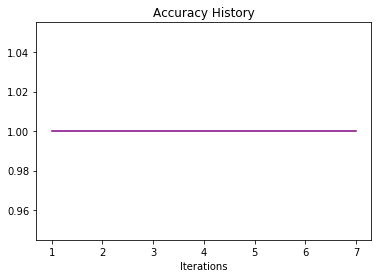

Highest accuracy => 1.0
[[0.19431361 0.19708386 0.19617216]
 [0.19431361 0.19708386 0.19617216]] [[0.08922505 0.1335444  0.1335444 ]]


In [15]:
w_init = 0.2                 # number of hidden units
n_hid = 2                    # number of hidden units
lr = 0.2                    # learning rate
n_iters = 7                  # number of iterations / epochs
batch = False                 # if true, algo uses batch update.
TT = np.asarray([[0,0,1],    # Truth table
                [0,1,0], 
                [1,0,0],
                [1,1,1]])


X = TT[:,:2]
y = TT[:,2:]
w1,w2,accuracies = backprop(X,y,n_hid,lr,w_init,n_iters,batch)

# print highest accuracy and display history
epochs = np.arange(1, len(accuracies)+1)
plt.plot(epochs, accuracies, c='purple')
plt.title('Accuracy History')
plt.xlabel('Iterations')
plt.show()
print(f"Highest accuracy => {max(accuracies)}")

print(w1,w2)

### 2. Handwritten digit recognition

###### Get digits from MNIST Dataset 
We also show some images for visualisation. The data is loaded directly from keras.datasets becuase the actual files are too large to download and reupload during submission.

In [7]:
from tensorflow.python.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reduce sizes
num_train = 1000
num_test = 100

X_train = X_train[:num_train]
Y_train = Y_train[:num_train]
X_test = X_test[:num_test]
Y_test = Y_test[:num_test]

# Convert y vectors to one hot vectors for our network to work
Y_train_OH = np.zeros((Y_train.size, Y_train.max()+1))
Y_train_OH[np.arange(Y_train.size),Y_train] = 1

Y_test_OH = np.zeros((Y_test.size, Y_test.max()+1))
Y_test_OH[np.arange(Y_test.size),Y_test] = 1

# flatten X and bring into [0,1] range
X_train = X_train.reshape(X_train.shape[0],-1) / 255
X_test = X_test.reshape(X_test.shape[0],-1) / 255

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Visualise:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    r = np.random.randint(X_train.shape[0])   # get a random image to show
    plt.title('True Label: '+str(Y_train[r])) # show its label as title
    plt.imshow(X_train[r].reshape(28,28), cmap='inferno')    # plot the image
plt.show()

In [ ]:
# Here you can see it overfits:
w_init = None                 # number of hidden units
n_hid = 3                    # number of hidden units
lr = 0.01                     # learning rate
n_iters = 100                  # number of iterations / epochs
batch = False                   # if true, algo uses batch update.
bias = True                   # dont add bias dimension


w1,w2,accuracies = backprop(X_train,Y_train_OH,n_hid,lr,w_init,n_iters,batch,bias)

# print highest accuracy and display history
epochs = np.arange(1, len(accuracies)+1)
plt.plot(epochs, accuracies, c='purple')
plt.title('Accuracy History')
plt.xlabel('Iterations')
plt.show()
print(f"Highest accuracy => {max(accuracies)}")

In [ ]:
# Here you can see it overfits to training data because of 100 hidden units:


w_init = None                 # number of hidden units
n_hid = 100                    # number of hidden units
lr = 0.2                    # learning rate
n_iters = 100                  # number of iterations / epochs
batch = False                   # if true, algo uses batch update.
bias = False                   # dont add bias dimension


w1,w2,accuracies = backprop(X_train,Y_train_OH,n_hid,lr,w_init,n_iters,batch,bias)

# print highest accuracy and display history
epochs = np.arange(1, len(accuracies)+1)
plt.plot(epochs, accuracies, c='purple')
plt.title('Accuracy History')
plt.xlabel('Iterations')
plt.show()
print(f"Highest accuracy => {max(accuracies)}")

###### <center> END OF ASSIGNMENT <br><br> Author: Rudraksh Kapil - 177154 <br><br> Thanks for reading :)